In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv(
    'https://labfile.oss.aliyuncs.com/courses/1283/telecom_churn.csv')

In [3]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


# 单变量可视化
单变量（univariate）分析一次只关注一个变量。当我们独立地分析一个特征时，通常最关心的是该特征值的分布情况。下面考虑不同统计类型的变量，以及相应的可视化工具。

## 数量特征
数量特征（quantitative feature）的值为有序数值。这些值可能是离散的，例如整数，也可能是连续的，例如实数。

## 直方图
直方图依照相等的间隔将值分组为柱，它的形状可能包含了数据分布的一些信息，如高斯分布、指数分布等。当分布总体呈现规律性，但有个别异常值时，你可以通过直方图辨认出来。当你使用的机器学习方法预设了某一特定分布类型（通常是高斯分布）时，知道特征值的分布是非常重要的。最简单的查看数值变量分布的方法是使用 DataFrame 的  hist() 方法绘制直方图。

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6f6ba7ac0>,
      dtype=object)

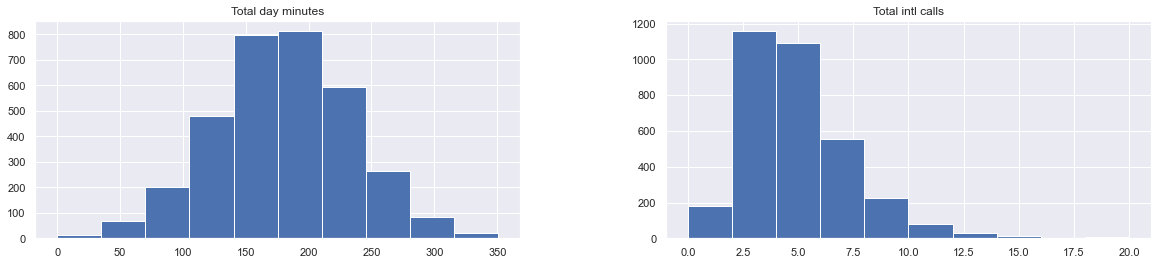

In [16]:
features = ['Total day minutes', 'Total intl calls']
df[features].hist(figsize=(20,4))

## 密度图
密度图（density plots），也叫核密度图（  kernel density estimate，KDE）是理解数值变量分布的另一个方法。它可以看成是直方图平滑（  smoothed ）的版本。相比直方图，它的主要优势是不依赖于柱的尺寸，更加清晰。



array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6f6cb7220>,
      dtype=object)

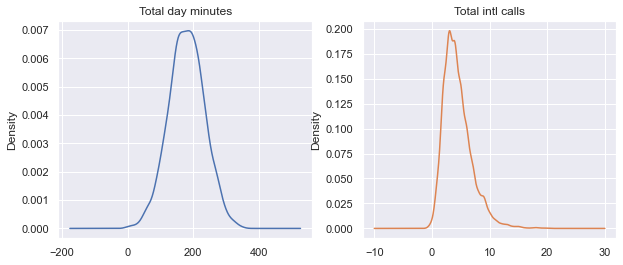

In [17]:
df[features].plot(kind='density',subplots=True,layout=(1,2),
                  sharex=False, figsize=(10,4), legend=False, title=features)

当然，还可以使用 seaborn 的  distplot() 方法观测数值变量的分布。例如，Total day minutes 每日通话时长 的分布。默认情况下，该方法将同时显示直方图和密度图。

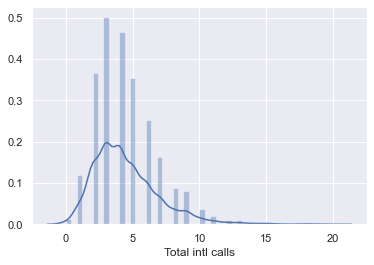

In [18]:
sns.distplot(df['Total intl calls'])

上图中直方图的柱形高度已进行归一化处理，表示的是密度而不是样本数。

## 箱线图
箱形图的主要组成部分是箱子（box），须（whisker）和一些单独的数据点（离群值），分别简单介绍如下：

* 箱子显示了分布的四分位距，它的长度由 25th , {Q1，下四分位数) 25th,（Q1，下四分位数） 和 75th , {Q3，上四分位数} 75th,（Q3，上四分位数） 决定，箱中的水平线表示中位数 （50%50）。
* 须是从箱子处延伸出来的线，它们表示数据点的总体散布，具体而言，是位于区间 （\text{Q1} - 1.5 \cdot \text{IQR}, \text{Q3} + 1.5 \cdot \text{IQR}）（Q1−1.5⋅IQR,Q3+1.5⋅IQR）的数据点，其中 \text{IQR} = \text{Q3} - \text{Q1}IQR=Q3−Q1，也就是四分位距。
* 离群值是须之外的数据点，它们作为单独的数据点，沿着中轴绘制。

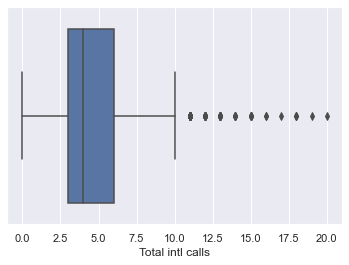

In [19]:
sns.boxplot(x='Total intl calls', data=df)

## 提琴形图
我们最后考虑的分布图形是提琴形图（violin plot）。提琴形图和箱形图的区别是，提琴形图聚焦于平滑后的整体分布，而箱形图显示了单独样本的特定统计数据。

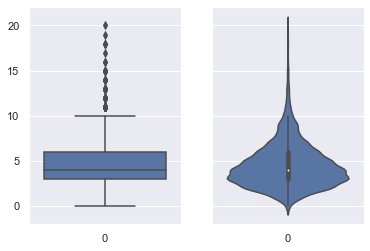

In [20]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(6, 4))
sns.boxplot(data=df['Total intl calls'], ax=axes[0])
sns.violinplot(data=df['Total intl calls'], ax=axes[1])

## 数据描述
除图形工具外，还可以使用 DataFrame 的  describe() 方法来获取分布的精确数值统计。

In [21]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


## 频率表

In [22]:
df['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

## 条形图
频率表的图形化表示是条形图。创建条形图最简单的方法是使用 seaborn 的  countplot() 函数。让我们来画出两个分类变量的分布。

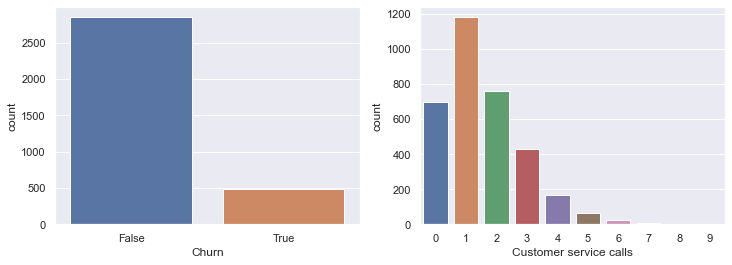

In [26]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

sns.countplot(x='Churn', data=df, ax=axes[0])
sns.countplot(x='Customer service calls', data=df, ax=axes[1])

条形图和直方图的区别如下：

直方图适合查看数值变量的分布，而条形图用于查看类别特征。
直方图的 X 轴是数值；条形图的 X 轴可能是任何类型，如数字、字符串、布尔值。
直方图的 X 轴是一个笛卡尔坐标轴；条形图的顺序则没有事先定义。
上左图清晰地表明了目标变量的失衡性。上右图则表明大部分客户最多打了 2-3 个客服电话就解决了他们的问题。不过，既然想要预测少数数据的分类（Churn==1），我们可能对少数不满意的客户的表现更感兴趣。所以让我们尝试一下更有趣的可视化方法：多变量可视化，看能否对预测有所帮助。

# 多变量可视化
多变量（multivariate）图形可以在单张图像中查看两个以上变量的联系，和单变量图形一样，可视化的类型取决于将要分析的变量的类型。

先来看看数量变量之间的相互作用。

## 相关矩阵
相关矩阵可揭示数据集中的数值变量的相关性。这一信息很重要，因为有一些机器学习算法（比如，线性回归和逻辑回归）不能很好地处理高度相关的输入变量。

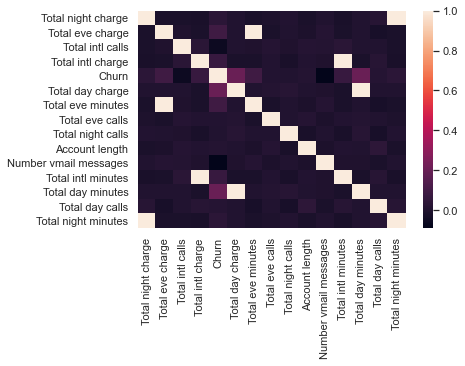

In [32]:
numerical = list(set(df.columns) - set(['State', 'International plan', 'Voice mail plan',
                                        'Area code', ' Churn', 'Customer service calls']))
corr_matrix = df[numerical].corr()
sns.heatmap(corr_matrix)

In [33]:
numerical = list(set(numerical) - set(['Total day charge', 'Total eve charge', 
                                       'Total night charge', 'Total intl charge']))

## 散点图
散点图（scatter plot）将两个数值变量的值显示为二维空间中的笛卡尔坐标（Cartesian coordinate）。通过 matplotlib 库的  scatter() 方法可以绘制散点图。

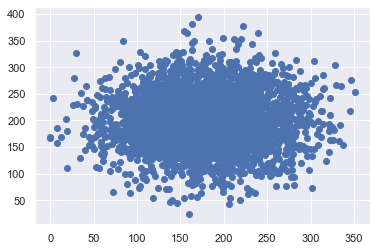

In [35]:
plt.scatter(df['Total day minutes'], df['Total night minutes'])

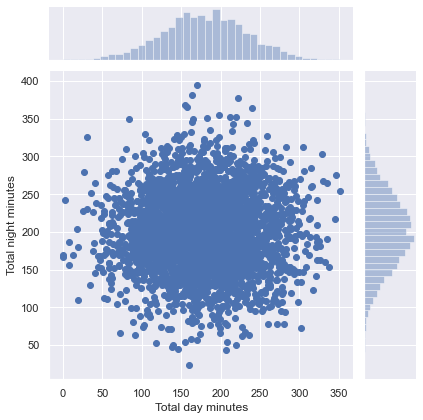

In [37]:
sns.jointplot(x='Total day minutes', y='Total night minutes',
              data=df, kind='scatter')

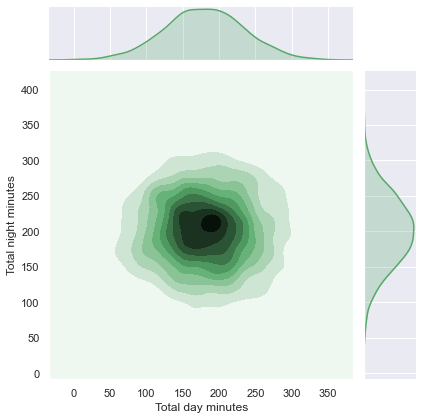

In [38]:
sns.jointplot(x='Total day minutes', y='Total night minutes',
              data=df, kind='kde', color='g')

## 散点图矩阵
在某些情形下，我们可能想要绘制如下所示的散点图矩阵（scatterplot matrix）。它的对角线包含变量的分布，并且每对变量的散点图填充了矩阵的其余部分。

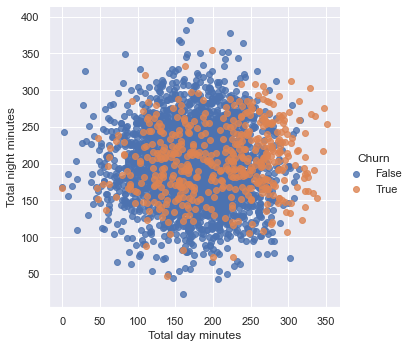

In [40]:
sns.lmplot('Total day minutes', 'Total night minutes',
           data=df, hue='Churn' , fit_reg=False)

## 箱形图

IndexError: index 3 is out of bounds for axis 0 with size 3

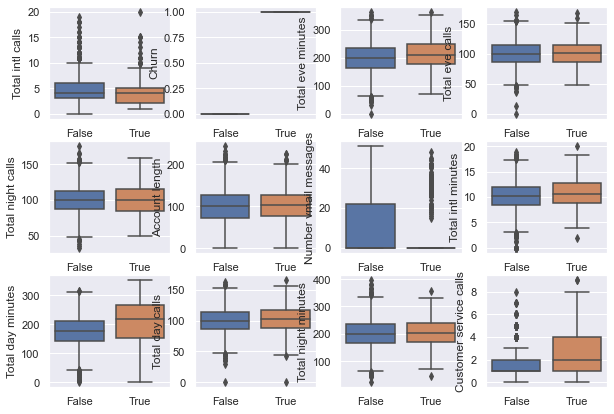

In [44]:
# 有时我们可以将有序变量作为数值变量分析
numerical.append('Customer service calls')

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10, 7))
for idx, feat in enumerate(numerical):
    ax = axes[int(idx / 4), idx % 4]
    sns.boxplot(x='Churn', y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout()

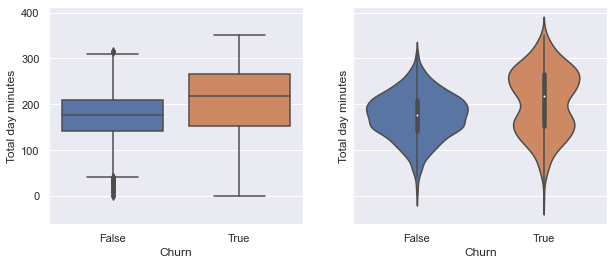

In [46]:
_, axes = plt.subplots(1,2, sharey=True, figsize=(10,4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0])
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1])

## 交叉表

In [14]:
pd.crosstab( df['Churn'], df['State'])

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


In [20]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

State,NJ,CA,TX,MD,SC,MI,MS,NV,WA,ME,...,RI,WI,IL,NE,LA,IA,VA,AZ,AK,HI
mean,0.264706,0.264706,0.25,0.242857,0.233333,0.219178,0.215385,0.212121,0.212121,0.209677,...,0.092308,0.089744,0.086207,0.081967,0.078431,0.068182,0.064935,0.0625,0.057692,0.056604


## 全局数据集可视化
上面我们一直在研究数据集的不同方面（facet），通过猜测有趣的特征并一次选择少量特征进行可视化。如果我们想一次性显示所有特征并仍然能够解释生成的可视化，该怎么办？

### 降维
大多数现实世界的数据集有很多特征，每一个特征都可以被看成数据空间的一个维度。因此，我们经常需要处理高维数据集，然而可视化整个高维数据集相当难。为了从整体上查看一个数据集，需要在不损失很多数据信息的前提下，降低用于可视化的维度。这一任务被称为降维（dimensionality reduction）。降维是一个无监督学习（unsupervised learning）问题，因为它需要在不借助任何监督输入（如标签）的前提下，从数据自身得到新的低维特征。

主成分分析（Principal Component Analysis, PCA）是一个著名的降维方法，我们会在之后的课程中讨论它。但主成分分析的局限性在于，它是线性（linear）算法，这意味着对数据有某些特定的限制。

与线性方法相对的，有许多非线性方法，统称流形学习（Manifold Learning）。著名的流形学习方法之一是 t-SNE。

## t-SNE
它的基本思路很简单：为高维特征空间在二维平面（或三维平面）上寻找一个投影，使得在原本的 n 维空间中相距很远的数据点在二维平面上同样相距较远，而原本相近的点在平面上仍然相近。

In [20]:
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

去除 State 州 和 Churn 离网率 变量，然后用  pandas.Series.map() 方法将二元特征的「Yes」/「No」转换成数值。 :

In [21]:
X = df.drop(['Churn', 'State'], axis=1)
X["International plan"] = X['International plan'].map({'Yes':1, 'No':0})
X['Voice mail plan'] = X['Voice mail plan'].map({'Yes':1, 'No':0})

使用 StandardScaler() 方法来完成归一化数据，即从每个变量中减去均值，然后除以标准差。

In [22]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

现在可以构建 t-SNE 表示了。

In [23]:
tsne = TSNE(random_state=17)
tsne_repr = tsne.fit_transform(X_scaled)

可视化数据

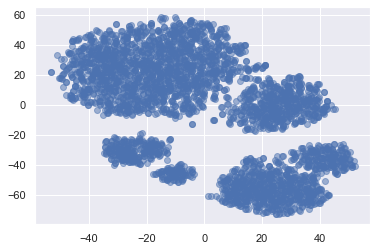

In [24]:
plt.scatter(tsne_repr[:, 0], tsne_repr[:, 1], alpha=.5)

根据离网情况给 t-SNE 表示加上色彩（蓝色表示忠实用户，黄色表示不忠实用户），形成离网情况散点图。

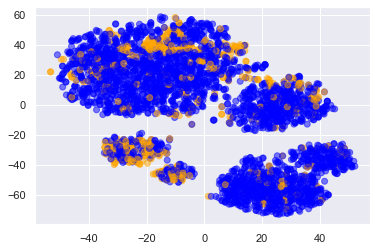

In [25]:
plt.scatter(tsne_repr[:,0], tsne_repr[:, 1],
            c=df['Churn'].map({False:'blue', True:'orange'}), alpha=.5)

可以看到，离网客户集中在低维特征空间的一小部分区域。为了更好地理解这一图像，可以使用剩下的两个二元特征，即 International plan 国际套餐 和 Voice mail plan 语音邮件套餐 给图像着色，蓝色代表二元特征的值为 Yes，黄色代表二元特征的值为 No。

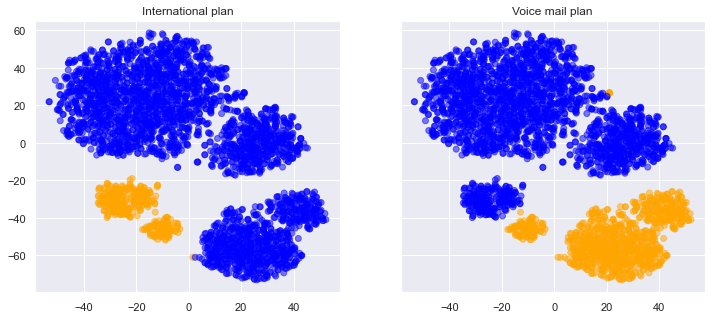

In [26]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(12, 5))

for i, name in enumerate(['International plan', 'Voice mail plan']):
    axes[i].scatter(tsne_repr[:, 0], tsne_repr[:, 1],
                    c=df[name].map({'Yes': 'orange', 'No': 'blue'}), alpha=.5)
    axes[i].set_title(name)